# CNN for Fashion MNIST dataset


------------

## The Challenge

**Project:  to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Data

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


## Visualizing the Data

In [2]:
import matplotlib.pyplot as plt

In [11]:
x_train[15]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  85, 188, 146,  79,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

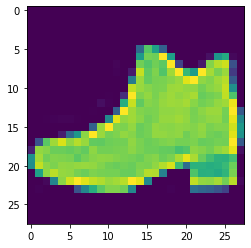

In [12]:
plt.imshow(x_train[15])

In [13]:
y_train[15]

9

## Preprocessing the Data

**Normalizing the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
x_train.max()

255

In [15]:
x_train = x_train/255

In [16]:
x_test = x_test/255

**Reshaping the X arrays to include a 4 dimension of the single channel.**

In [20]:
x_test.shape

(10000, 28, 28)

In [18]:
x_train=x_train.reshape(60000, 28, 28,1)

In [21]:
x_test=x_test.reshape(10000, 28, 28,1)

**Converting the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
from tensorflow.keras.utils import to_categorical 

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
y_cat_train=to_categorical(y_train)

In [27]:
y_cat_test=to_categorical(y_test)

In [30]:
y_cat_train[15]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Building the Model

**Using Keras to create a model consisting of at least the following layers:**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compiling the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten 

In [32]:
model=Sequential()
# Convulutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu',))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten image from 28*28 to764 before final layer
model.add(Flatten())

# 128 Neron in Dense hidden layer 
model.add(Dense(128, activation ='relu'))


# The last layer is the classifier with possible 10 outputs
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
             optimizer='rmsprop', 
             metrics=['accuracy'])


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**Train/Fitting the model to the x_train set.**

In [34]:
model.fit(x_train, y_cat_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 232us/sample - loss: 0.4045 - accuracy: 0.8542
Epoch 2/10
60000/60000 [==============================] - 13s 225us/sample - loss: 0.2774 - accuracy: 0.9008
Epoch 3/10
60000/60000 [==============================] - 13s 223us/sample - loss: 0.2399 - accuracy: 0.9142
Epoch 4/10
60000/60000 [==============================] - 13s 223us/sample - loss: 0.2147 - accuracy: 0.9233
Epoch 5/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.1968 - accuracy: 0.9294
Epoch 6/10
60000/60000 [==============================] - 14s 225us/sample - loss: 0.1828 - accuracy: 0.9353
Epoch 7/10
60000/60000 [==============================] - 13s 223us/sample - loss: 0.1708 - accuracy: 0.9402
Epoch 8/10
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1604 - accuracy: 0.9440
Epoch 9/10
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1536 - accuracy: 0.9

### Evaluating the Model

**Showing the accuracy,precision,recall,f1-score the model achieved on the x_test data set**

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3316 - accuracy: 0.9072


[0.3316142331302166, 0.9072]

In [37]:
from sklearn.metrics import classification_report

In [38]:
predictions=model.predict_classes(x_test)

In [39]:
y_cat_test.shape

(10000, 10)

In [40]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [41]:
predictions[0]

9

In [42]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.86      0.85      1000
           3       0.93      0.92      0.92      1000
           4       0.85      0.85      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.82      0.63      0.71      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Done!!!